# A Workbook for Qiskit Developer Certification

Hello everyone! This is Bartu, a fellow Qiskitter. I have recently taken the Certification exam and have followed the excellent [study guide](https://slides.com/javafxpert/prep-qiskit-dev-cert-exam) by James Weaver, which also goes over the sample exam, so make sure to check it out if you haven't already!

While following the guide, I wanted to re-create examples from all specified topics on my own in an organized way to make connections easier. After completing the exam and getting my badge, I thought, hey, why not make this public? Maybe someone else will also find it useful! So this is basically what this workbook is about and I do hope that you get something out of it. 

**Important Notes:** 

1- This has been prepared in IBMQ Experience so you might want to use that instead of your local environment for avoiding conflicting versions and access to all widgets easily etc. 

2-I have tried to mix up many variations of doing the same thing for demonstrating, but probably inescapably missed some things, so I do advise you also check for that in the study guide and the Qiskit documentation after you go through this Workbook if you want to expand your knowledge :) 

3-Also, no info has been given on how gates work or what is a q-sphere etc. assuming the reader is already familiar with these material! This workbook was simply prepared with the intention of being exposed to all the materials covered in the exam as rapidly as possible while also remaining clear.

**Rough Guidline:** I intentionally didn't break this into sections explicitly to keep the feeling of flow I felt when writing these, and I think it is best to just go through all in one sitting. To avoid (en)tangling, I tried to comment on the code as much as I can, as well as creating some titles inside the code. Do let me know if you think writing a *Contents* explicitly for it would be beneficial :) You can contact me through Qiskit Slack (bartubisgin) or LinkedIn.

Here are the subjects you will be presented with, in the exam:
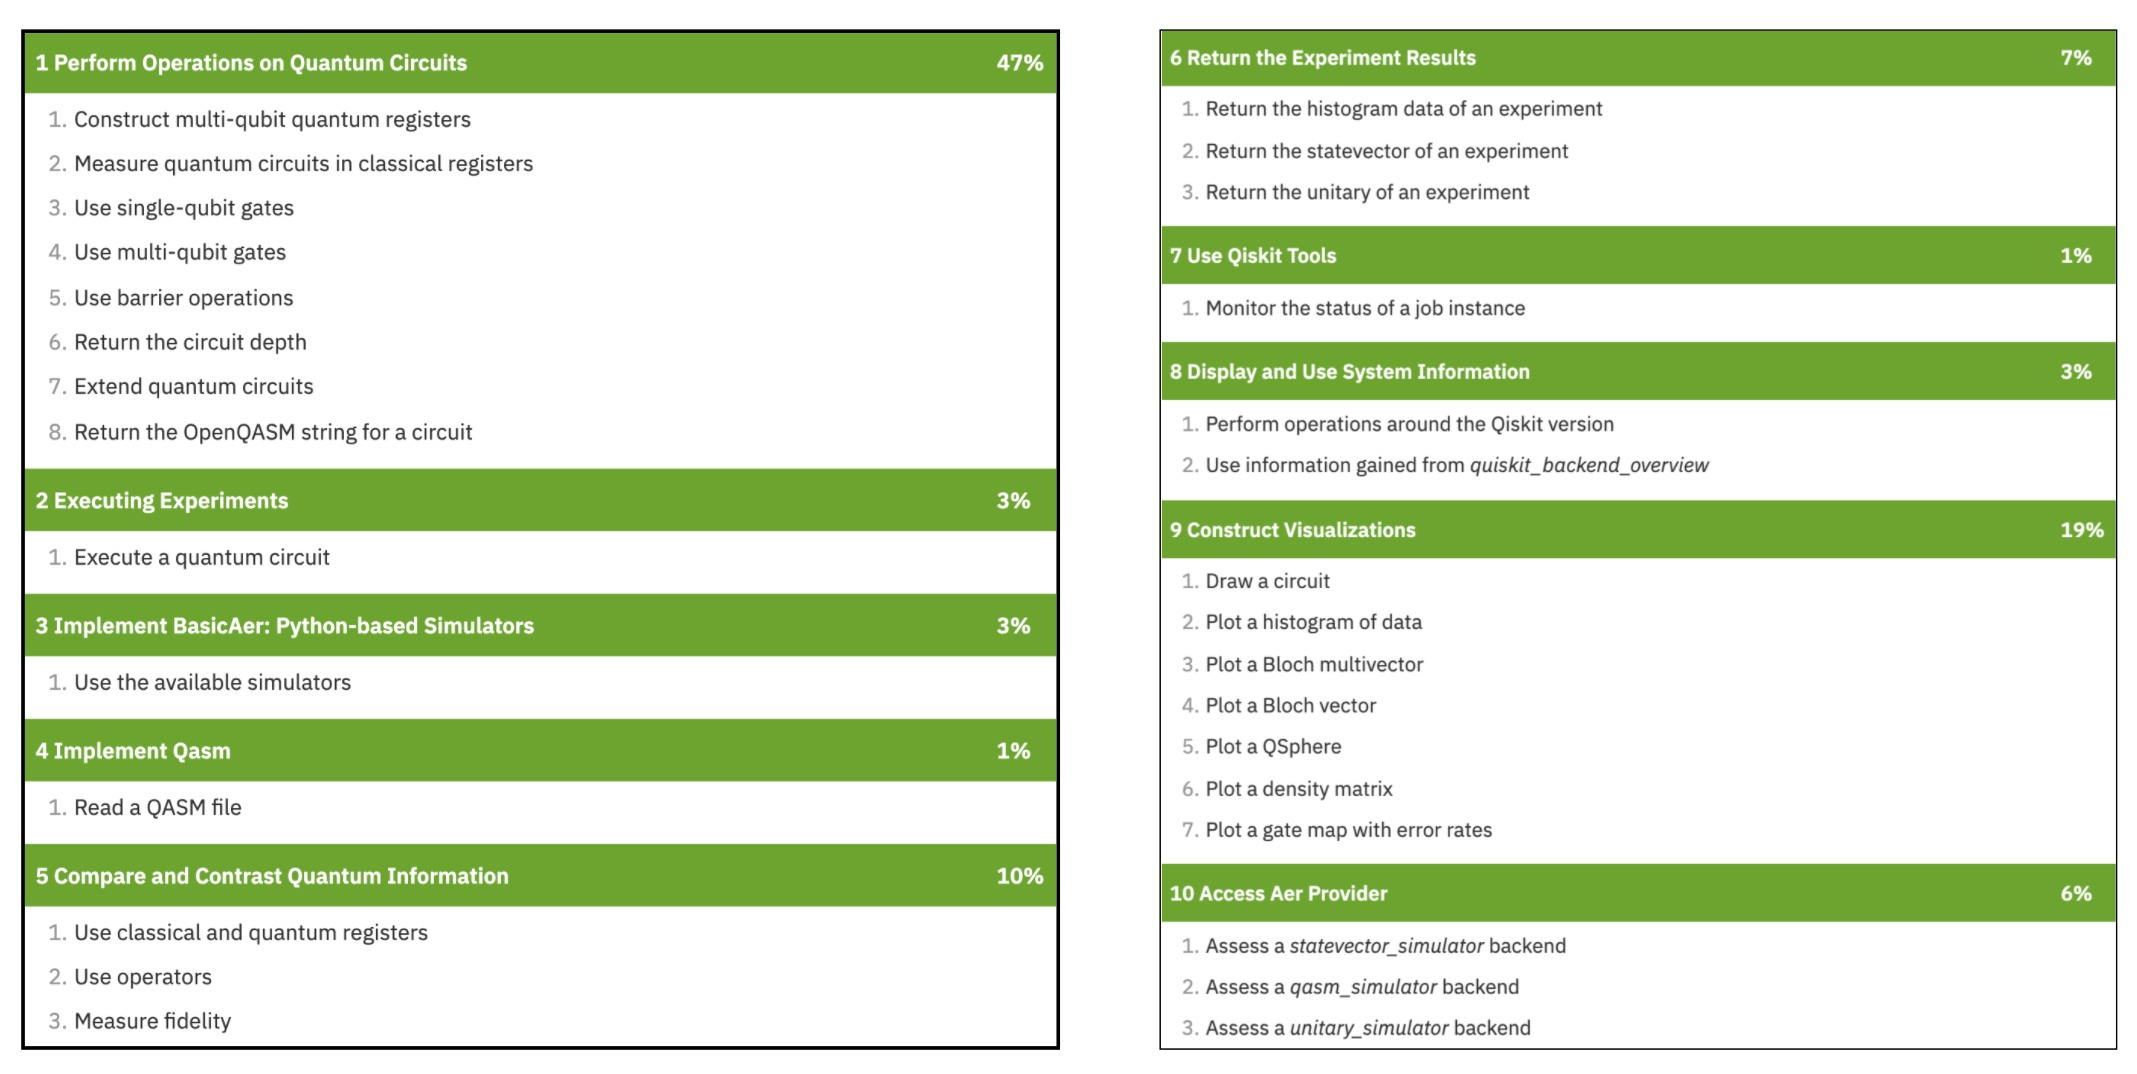
Credit: [IBM Quantum](https://www.ibm.com/certify/exam?id=C1000-112)

## The Usual Suspects: *Preliminary Imports* (Doesn't include all that will be needed for demonstration purposes later)

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

## Building the 4 Bell States and Using the Statevector Object

In [2]:
#bell states are very important to know in general
#here we create all 4 bell states by modifying the same circuit 
#i've named them bell_0-1-2-3 

#additionally, we are creating a Statevector object
#and priting out the state using LaTeX

#note that this statevector object DOES NOT require
#any kind of simulation to get the information

from qiskit.quantum_info import Statevector

bell_0 = QuantumCircuit(2)
bell_0.h(0)
bell_0.cx(0,1)

sv = Statevector.from_label('00') #we used the .from_label(), we could also use .from_int(), for more check docs!
sv_ev = sv.evolve(bell_0) #we evolve this initial state through our circuit
sv_ev.draw('latex') #we print out the state via. LaTeX

<IPython.core.display.Latex object>

In [103]:
bell_1 = QuantumCircuit(2)
bell_1.h(0)
bell_1.z(0)
bell_1.cx(0,1)

sv_ev2 = sv.evolve(bell_1)
sv_ev2.draw('latex')

<IPython.core.display.Latex object>

In [104]:
bell_2 = QuantumCircuit(2)
bell_2.h(0)
bell_2.x(1)
bell_2.cx(0,1)

sv_ev_2 = sv.evolve(bell_2)
sv_ev_2.draw('latex')

<IPython.core.display.Latex object>

In [105]:
bell_3 = QuantumCircuit(2)
bell_3.h(0)
bell_3.x(1)
bell_3.cx(0,1)
bell_3.z(1)

sv_ev_3 = sv.evolve(bell_3)
sv_ev_3.draw('latex')

<IPython.core.display.Latex object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


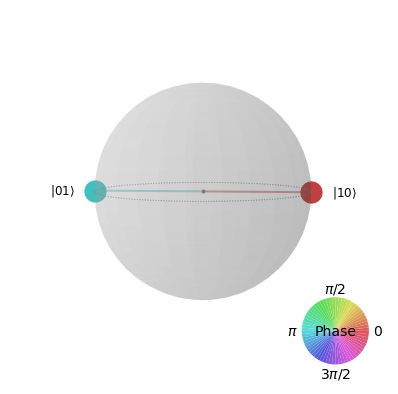

In [106]:
#the Statevector object can be directly drawn on a qsphere 
#with the same .draw() method by simply changing the call from 'latex' to 'qsphere'
#this will NOT be the case once we move on to the statevectors from simulation

sv_ev_3.draw('qsphere') 

## Build the GHZ State

In [4]:
#we have seen how to get the bell states and also get their Statevector objects
#let's move to another famous state and its circuit, the GHZ
#and let's actually see our circuits!

ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx([0,0],[1,2]) #notice we didn't need to specify 2x ghz.cx() by utilizing our []s

ghz.draw('text') #we could also draw this with matplotlib by specifying 'mpl'

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

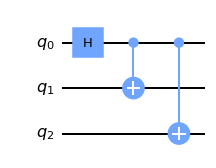

In [5]:
ghz.draw('mpl') #note that IBMQ resorts to this method as the default, if nothing is specified
#of course, if you import it as 'plt' you will need to use it this way

In [7]:
sv = Statevector.from_int(0,2**3) #here we employed the .from_int()
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [11]:
sv = Statevector.from_label('000') #doing the same with .from_label()
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

## Statevector objects have method of .draw() directly as stated!

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


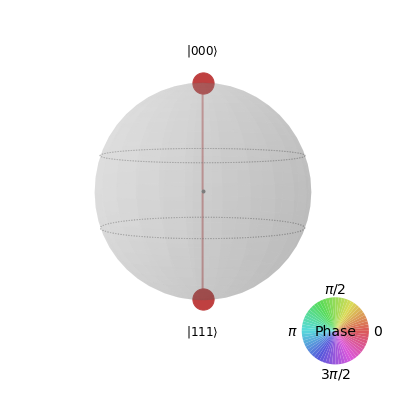

In [12]:
#again hitting on the home-point I specified earlier
sv_ev.draw('qsphere')

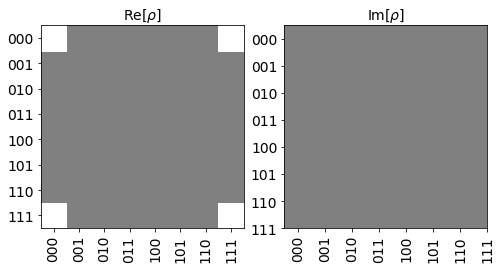

In [13]:
#they also have this feature for drawing a hinton directly!
sv_ev.draw('hinton')

## We could also have used the statevector_simulator to create a statevector instead!

In [38]:
#now, calling a Statevector object is fun and all 
#but what is more fun is doing the same thing via. simulation

#BasicAer is from where we get our main 3 simulators, these are:
# 1-'qasm_simulator'
# 2-'statevector_simulator'
# 3-'unitary_simulator'

BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [5]:
backend_sv = BasicAer.get_backend('statevector_simulator') #here we get the statevector_simulator
job = execute(ghz, backend_sv, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
sv_ev2 = result.get_statevector(ghz) #finally, we get the statevector from the result

#CAUTION: this way of getting the statevector does not have the method '.draw()'
#in order to visualize you need plotting functions directly

#NOTE: that we did not need any measurements for this type of operation!
#This won't be the case once we move to experimenting with the qasm_simulator

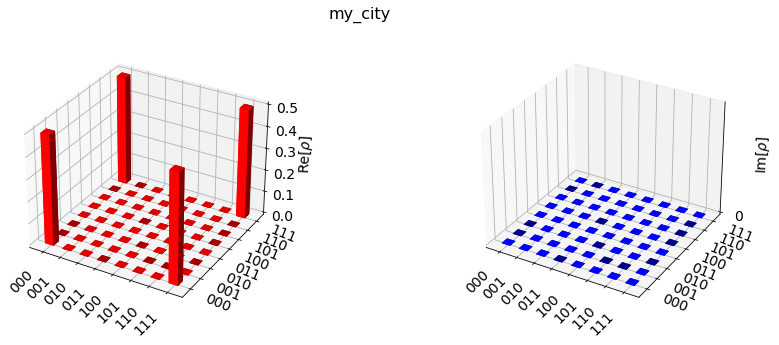

In [15]:
#as stated above, now, if we wanna plot our state, we need the actual plotting functions
#there are multiple cool ways of visualizing a state

#1-Plotting the DensityMatrix aka. The state_city

plot_state_city(sv_ev2, title='my_city',color=['red','blue']) #you can set a title, and specify colors, for more, check docs

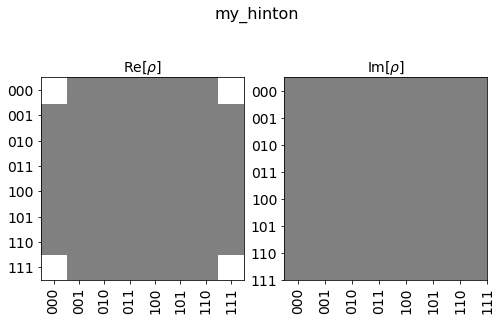

In [16]:
#2-Plot your hinton!
plot_state_hinton(sv_ev2, title='my_hinton')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


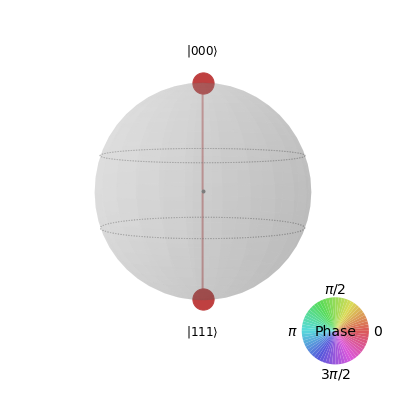

In [17]:
#3-Plot your good old pal QSphere, with a function directly!
plot_state_qsphere(sv_ev2) #only figsize can be specified inside

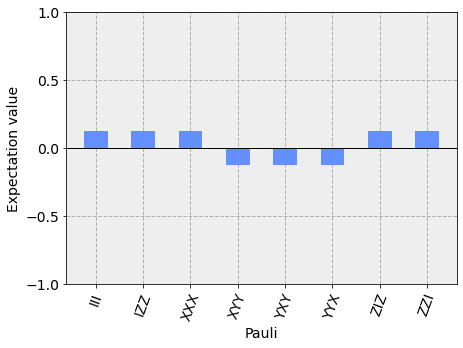

In [18]:
#4-Whoa you can also plot the Pauli Expectation Values
plot_state_paulivec(sv_ev2)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


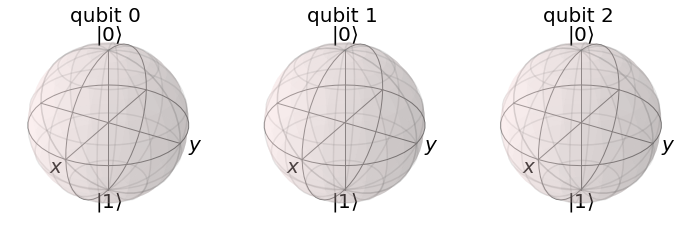

In [19]:
#5-And finally, you can plot the Bloch Vectors for each qubit via Bloch_MULTIVECTOR

#Note: This is something I haven't yet made clear for myself, but I believe there are no drawings
#because this is a maximally entangled state; don't pick me up on that, I'll update it once I make sure :)

plot_bloch_multivector(sv_ev2)

## Know your Bloch_Vector and Bloch_**Multi**vector

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:402: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


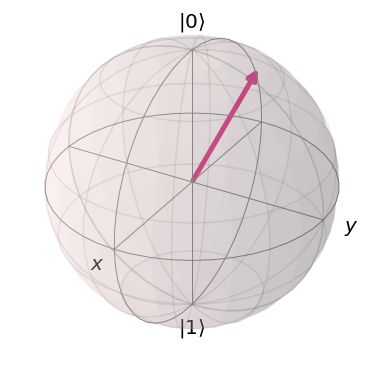

In [8]:
#there is an important distinction between these two, the multivector as we saw
#plots a state coming from a circuit
#whereas the mere bloch_vector needs coordinate specifications
#there coordinates can be cartesian, or spherical - I advise you check docs!

plot_bloch_vector([0,0.5,1])
#here for [x,y,z]; x=Tr[Xρ] and similar for y and z

## Circuits with explicit Quantum Registers??

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


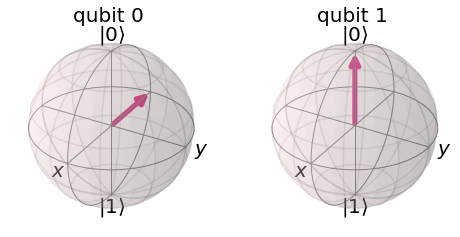

In [7]:
#here we create 2 registers explicitly before creating our circuit
#and we get our statevector the same way
#then we plot its bloch_multivector

q_a = QuantumRegister(1,'q_a')
q_b = QuantumRegister(1, 'q_b')
qc = QuantumCircuit(q_a, q_b)
qc.h(0) 
qc.z(0) 

back = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back).result()
sv = result.get_statevector()
plot_bloch_multivector(sv) #voila!

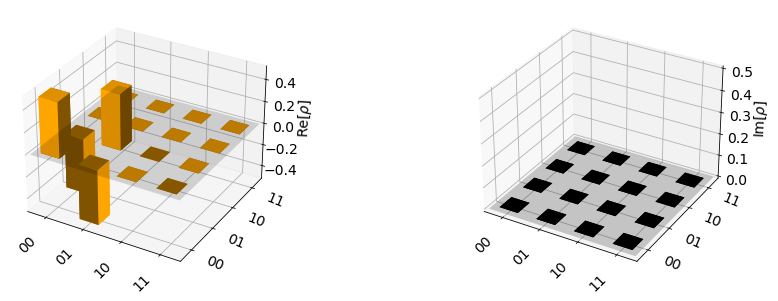

In [94]:
plot_state_city(sv, color=['orange','black'])

## How about doing an actual experiment and getting Probabilities?
## Enter, qasm_simulator!

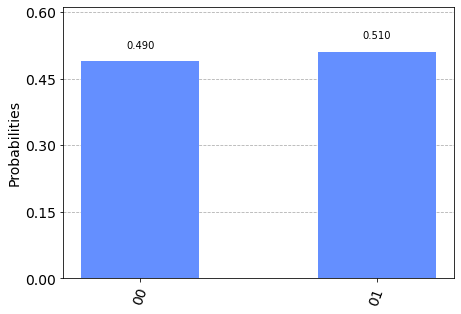

In [96]:
#to do this, we need to measure our circuit
#and then run the qasm simulator
#how you perform your measurements can vary quite a bit

qc.measure_all() #here we employ the measure_all() which CREATES a classical register for a circuit that doesn't have one
#NOTE: this means, if your circuit already had a classical register, it would create another one!
#so measure_all() is usually used for circuits that do not have a classical register, for a quick sim like this

qasm_sim = BasicAer.get_backend('qasm_simulator') #this time we call the qasm simulator
result = execute(qc, qasm_sim).result() # NOTICE: we can skip some steps by doing .result() directly, we could go further!
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## We can extend a pre-defined circuit with 'compose'

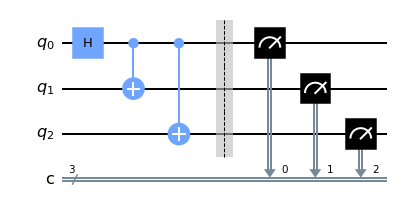

In [30]:
meas = QuantumCircuit(3,3) #here we create a new quantum circuit just with a barrier and measurements
meas.barrier()
meas.measure([0,1,2],[0,1,2]) #notice how again, we didn't need 3x measures by utilizing []
#also notice the measure here measures the respective quantum registers into respective classical registers
#the ordering does play a role!

circ = meas.compose(ghz,range(3),front=True) #the compose method requires what circuit we want to compose with,
#and the front=True ensures we get GHZ before we measure all our qubits at the start!

circ.draw('mpl')

In [31]:
backend = BasicAer.get_backend('qasm_simulator')
circ = transpile(circ, backend)
job = backend.run(circ, shots=1024) #notice here we use .run instead of execute, this is showing it can be done
#most usually we employ 'execute' though because it is more flexible
result = job.result()
counts = result.get_counts()
print(counts) #now, we could also just print our counts in an un-spectacular way compared to plotting the histograms!

{'111': 497, '000': 527}


In [32]:
#let's run with execute instead of run now
job2 = execute(circ, backend, shots=1024)
result2 = job2.result()
counts2 = result2.get_counts()
print(counts2) 
#here we also demonstrate the probabilistic nature of quantum measurement,
#as you can see the counts are different for 2 different experiments on the same circuit

{'000': 528, '111': 496}


## Having 2 different results tie in well with our next demonstration!

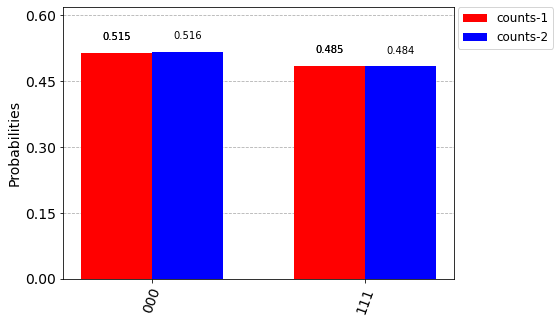

In [33]:
leg = ['counts-1','counts-2']
plot_histogram([counts,counts2], legend=leg, sort='asc',color=['red','blue']) 
#there is also a way to not show probabilities ON TOP of the bars with the method bar_labels=False
#for rest of the methods, check docs!

## We can also work on real backend by provider, and monitor the job

In [34]:
import qiskit.tools.jupyter
%qiskit_job_watcher #this creates a pop up of your jobs, check it out by running!

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [54]:
from qiskit.tools import job_monitor
quito = provider.get_backend('ibmq_quito') #to call a real backend, we use 'provider' object instead of BasicAer
#Note: you can check which backends are available for you too!
job = execute(circ, quito)
job_monitor(job)

Job Status: job has successfully run


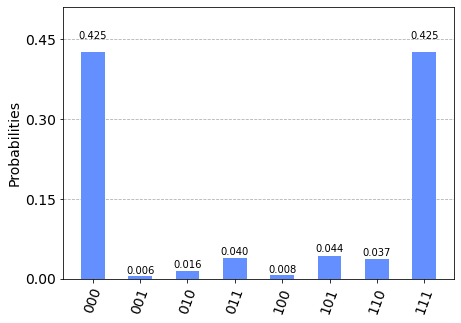

In [57]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Until now, we've used perfect, error-prone, noisless simulators; here we see a real machine, with all its errors!

## We can also create operator forms of circuits

In [9]:
from qiskit.quantum_info import Operator
U = Operator(ghz) #we can turn our ghz circuit from above into an operator!
U.data

#NOTE: this is very similar to getting the Statevector object directly, 
#just this time, for getting the operator,
#we will see we can also do this via. simulation,
#just like we did for the state!

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [10]:
#if we so want, we can round all these numbers by using np.around
#and specify how many decimals we want
np.around(U.data, 3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

## We could also do it with a unitary_sim, just like we did with statevector_sim!

In [41]:
backend_uni = BasicAer.get_backend('unitary_simulator') #we get the unitary simulator
U = execute(ghz,backend_uni).result().get_unitary(decimals=3) #we skip a whole lotta steps!
#instead of rounding with np.around(), you can also use 'decimals' in get_unitary like above
U

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

## Creating a circuit with Q and C registers explicitly

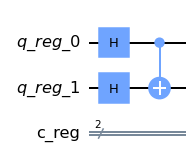

In [97]:
#another example for getting the unitary
#but also demonstrating explicitly defining a classical register this time too

q = QuantumRegister(2,'q_reg')
c = ClassicalRegister(2,'c_reg')
qc = QuantumCircuit(q,c)
qc.h(q[0:2])
qc.cx(q[0], q[1])
qc.draw('mpl')

In [43]:
U_bell = Operator(qc)
np.around(U_bell.data,3)

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

In [44]:
back = BasicAer.get_backend('unitary_simulator')
result = execute(qc, back).result()
U = result.get_unitary(decimals=3)
U

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]])

## We can also initialize a desired_state via initialize method, as long as the desired_state is valid (the probs add up to 1) - We can also test the state_fidelity() method which checks if two states are the same!

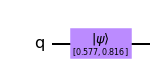

In [45]:
#Testing for fidelity with initializer
a = 1/np.sqrt(3) #we can define a state ourselves, we could also get a random state, check the docs!
desired_state = [a,np.sqrt(1-a**2)] #state is defined such that it is a valid one!
q_reg = QuantumRegister(1,'q')
qc = QuantumCircuit(q_reg)
qc.initialize(desired_state,0) #as simple as this!
qc.draw('mpl')

## There is also decomposing I heard?

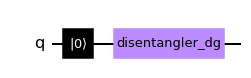

In [51]:
decomp = qc.decompose() #you heard right!
decomp.draw() #but what is this weird |0>? It is a reset! Meaning that initialize as a whole is NOT a Gate!
#It is irreversible because it has a reset! This is explained very well in the Qiskit textbook as far as I remember!
#And also, how it actually works can be found in the docs too, for the curious!

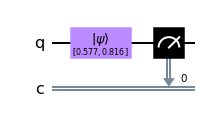

In [52]:
c_reg = ClassicalRegister(1,'c')
meas = QuantumCircuit(q_reg, c_reg)
meas.measure(0,0)
circ = meas.compose(qc, range(1), front=True)
circ.draw('mpl')

In [53]:
#squaring the amplitudes
alpha_squared = 0.577 **  2
beta_squared = 0.816 ** 2
print(alpha_squared, beta_squared)

0.332929 0.6658559999999999


In [54]:
back = BasicAer.get_backend('qasm_simulator')
job = execute(circ, back, shots=1000)
counts = job.result().get_counts()
print(counts)

{'1': 628, '0': 372}


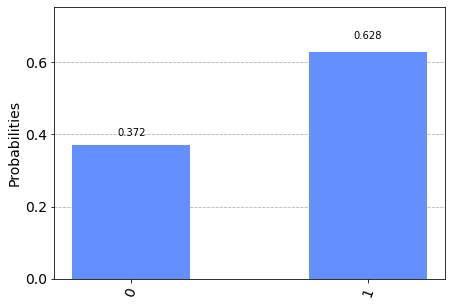

In [55]:
plot_histogram(counts)

## We can compare the fidelities of the state created and the state we wanted in the first place, and because we know Initialize works, we expect them to match up

In [56]:
#for getting the statevector from the circuit, we employ our old friend
#the .get_statevector via the state-vec sim

back_sv = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back_sv).result()
qc_sv = result.get_statevector(qc)
qc_sv

array([0.57735027+0.j, 0.81649658+0.j])

In [57]:
from qiskit.quantum_info import state_fidelity
state_fidelity(desired_state, qc_sv) 
#this compares the statevector we got from simulation vs. the state we wanted to initialize
#and surprise! they match perfectly, which is expected!

1.0

## I should also be able to get fidelities for gates and processes right?

In [43]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a

#these differ only by a phase so the gate and process
#fidelities are expected to be 1

a = average_gate_fidelity(op_a,op_b)
a

1.0

In [44]:
b = process_fidelity(op_a, op_b)
a == b

True

## We can also get the initializer in matrix form via. get_unitary()!

In [58]:
#i'm just trying to mix everything up at this point, so that it becomes memorable :)

back_uni = BasicAer.get_backend('unitary_simulator')
job = execute(qc, back_uni)
result = job.result()
U_qc = result.get_unitary(decimals=3)
U_qc

array([[ 0.577+0.j, -0.816+0.j],
       [ 0.816+0.j,  0.577+0.j]])

## We can wrap up circuits to gates with .to_gate() method

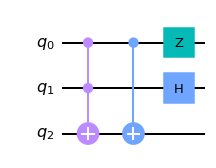

In [59]:
qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.cx(0,2)
qc.h(1)
qc.z(0)
qc.draw('mpl')

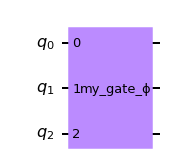

In [63]:
qc_gate = qc.to_gate()
qc_gate.name = 'my_gate_ϕ' #we can even give it a name!
circ = QuantumCircuit(3)
circ.append(qc_gate, [0,1,2])
circ.draw('mpl')

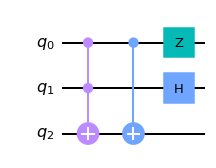

In [64]:
circ_decomp = circ.decompose() #aaaand we can decompose it back!
circ_decomp.draw('mpl')

## We can also actually create custom Controlled-Gates!

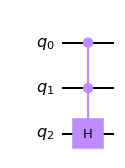

In [11]:
from qiskit.circuit.library import HGate
ch = HGate().control(2) #here we specify how many controls we want
qc = QuantumCircuit(3)
qc.append(ch, [0,1,2]) #the [a,b,c] correspond to controls and target respectively
qc.draw('mpl')

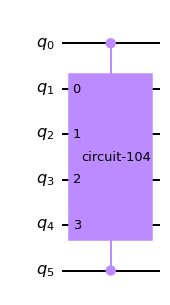

In [12]:
circ = QuantumCircuit(4)
circ.h(range(2))
circ.cx(0,1)
circ.cx(0,3)
circ.crz(np.pi/2,0,2)

my_gate = circ.to_gate().control(2)
qc = QuantumCircuit(6)
qc.append(my_gate, [0,5,1,2,3,4])
qc.draw()
#can also decompose this

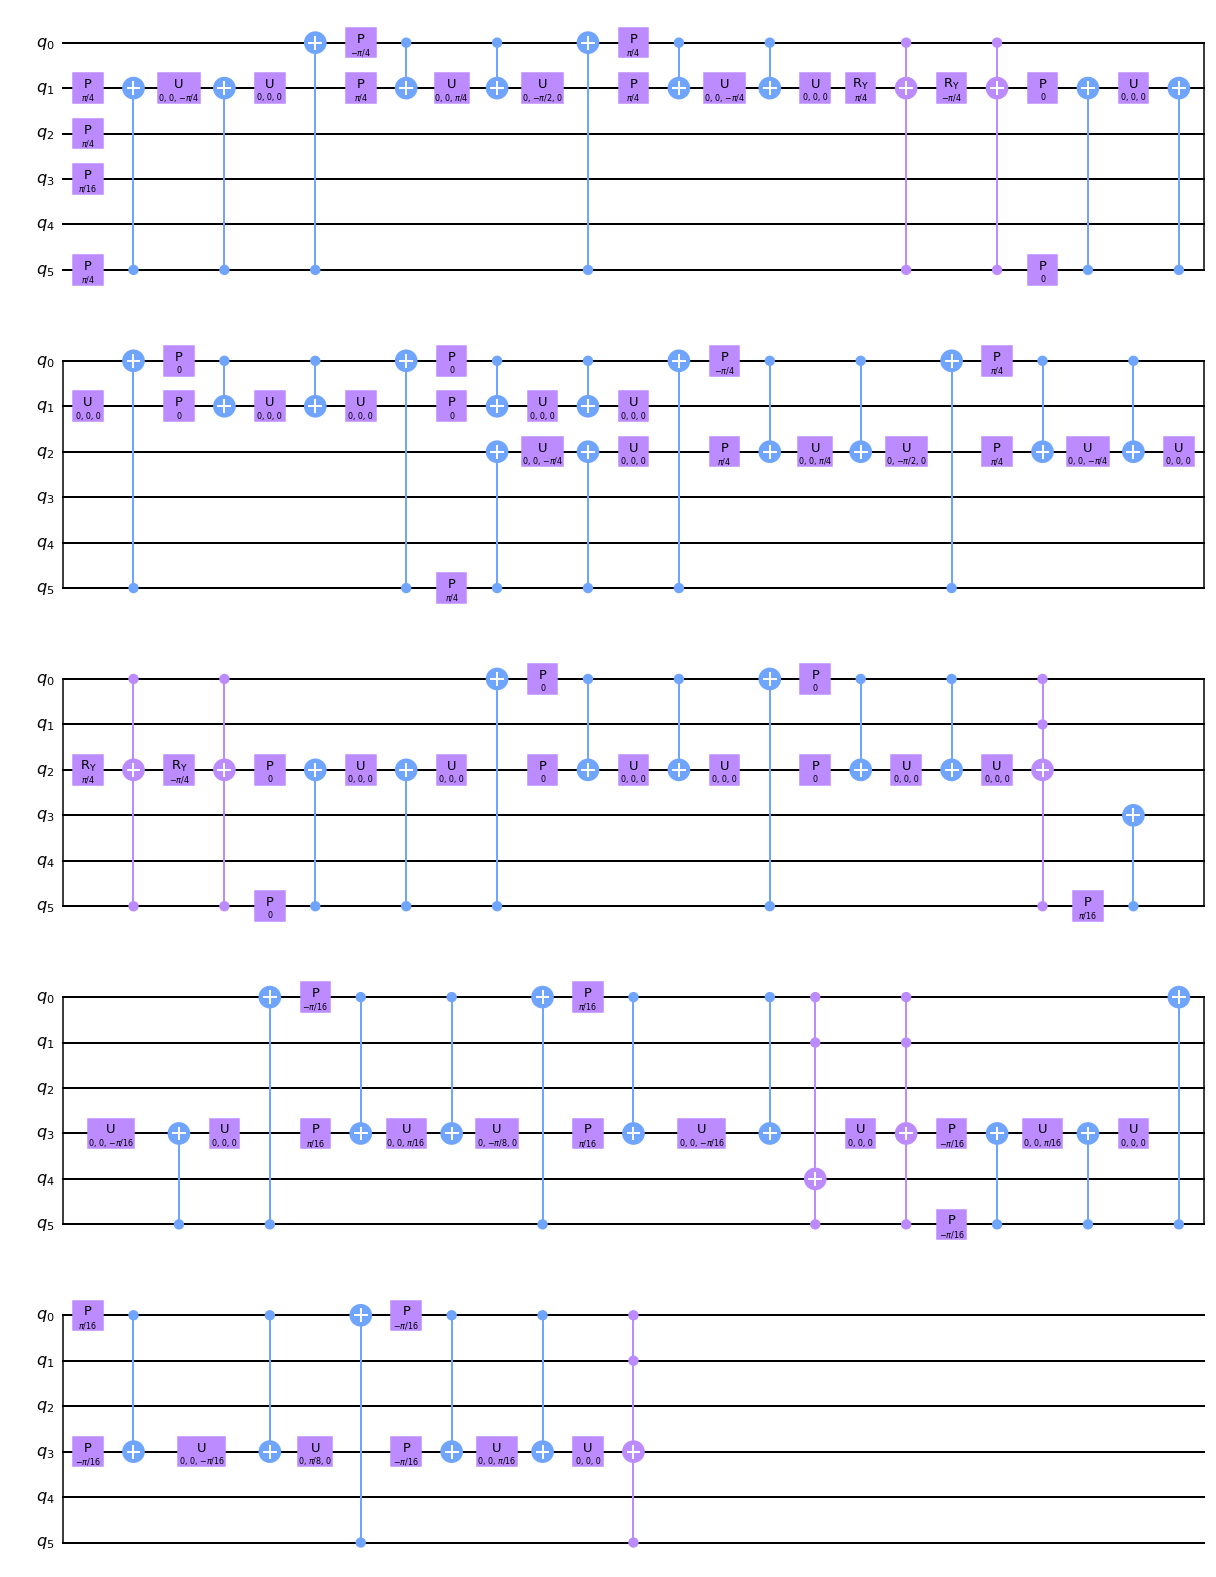

In [14]:
circ = qc.decompose()
circ.draw() #whoa this would be a nightmare to actually do manually, good thing Qiskit has this ;) !

# After creating a circuit, we can transpile it either for the backend or for a specific set of basis gates

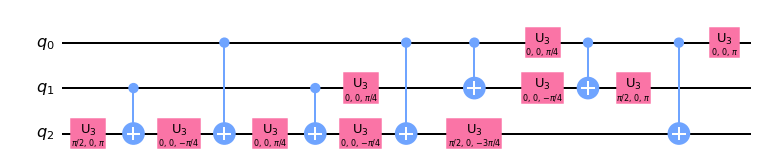

In [15]:
#going back to our simpler circuit!
qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.cx(0,2)
qc.h(1)
qc.z(0)

trans = transpile(qc, basis_gates = ['u3','cx','s'])
trans.draw('mpl')

# Advanced Circuit Visuals

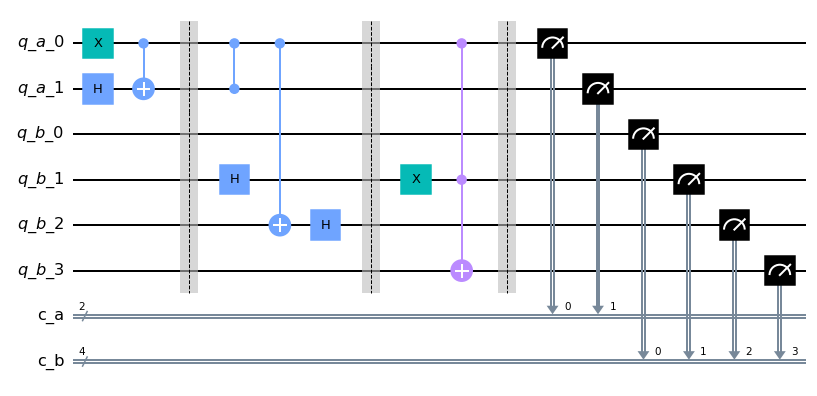

In [17]:
q_a = QuantumRegister(2, 'q_a')
q_b = QuantumRegister(4, 'q_b')
c_a = ClassicalRegister(2,'c_a')
c_b = ClassicalRegister(4,'c_b')

qc = QuantumCircuit(q_a, q_b,c_a, c_b)

qc.x(0)
qc.h(1)
qc.cx(0,1)
qc.barrier()
qc.cz(0,1)
qc.cx(0,4)
qc.h(3)
qc.h(4)
qc.barrier()
qc.x(3)
qc.ccx(0,3,5)
qc.barrier()
qc.measure(q_a, c_a)
qc.measure(q_b, c_b)
qc.draw()

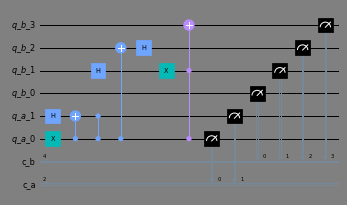

In [18]:
#Now look at all the crazy things we can do with the .draw() method! Who would've imagined!
qc.draw(reverse_bits=True, plot_barriers=False,scale=0.5, style = {'backgroundcolor': 'gray'})

In [19]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(qc, output='text') #oh and yeah, there is this, circuit_drawer- something to keep in mind!

┌───┐      ░                 ░            ░ ┌─┐               
q_a_0: ┤ X ├──■───░───■────■────────░────────■───░─┤M├───────────────
       ├───┤┌─┴─┐ ░   │    │        ░        │   ░ └╥┘┌─┐            
q_a_1: ┤ H ├┤ X ├─░───■────┼────────░────────┼───░──╫─┤M├────────────
       └───┘└───┘ ░        │        ░        │   ░  ║ └╥┘┌─┐         
q_b_0: ───────────░────────┼────────░────────┼───░──╫──╫─┤M├─────────
                  ░ ┌───┐  │        ░ ┌───┐  │   ░  ║  ║ └╥┘┌─┐      
q_b_1: ───────────░─┤ H ├──┼────────░─┤ X ├──■───░──╫──╫──╫─┤M├──────
                  ░ └───┘┌─┴─┐┌───┐ ░ └───┘  │   ░  ║  ║  ║ └╥┘┌─┐   
q_b_2: ───────────░──────┤ X ├┤ H ├─░────────┼───░──╫──╫──╫──╫─┤M├───
                  ░      └───┘└───┘ ░      ┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐
q_b_3: ───────────░─────────────────░──────┤ X ├─░──╫──╫──╫──╫──╫─┤M├
                  ░                 ░      └───┘ ░  ║  ║  ║  ║  ║ └╥┘
c_a: 2/═════════════════════════════════════════════╩══╩══╬══╬══╬══╬═
                                                    0  1  ║  ║  ║  ║ 
                                                          ║  ║  ║  ║ 
c_b: 4/═══════════════════════════════════════════════════╩══╩══╩══╩═
                                                          0  1  2  3

## Wait, what if I want to export to QASM?

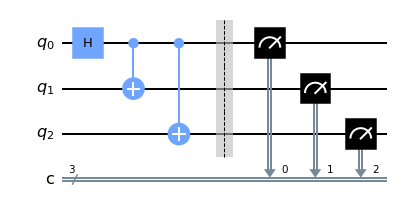

In [6]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw()

In [7]:
qasm_str = qc.qasm() #returning a qasm string, THIS SIMPLE
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nh q[0];\ncx q[0],q[1];\ncx q[0],q[2];\nbarrier q[0],q[1],q[2];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\n'

## And what if I want to import from it?

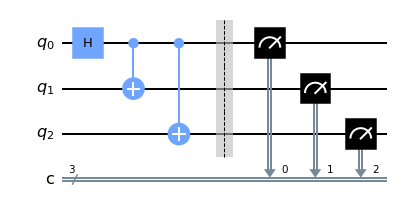

In [23]:
circ = QuantumCircuit.from_qasm_str(qasm_str) #you got to be kidding!
circ.draw() #you can also read a file directly with .from_qasm_file('path'), check out docs!

## Circuit depth?

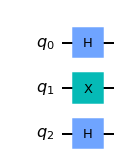

In [30]:
#what do you think the circuit depth of this picture is?
#hint: not 2

circ = QuantumCircuit(3)
circ.h(0)
circ.x(1)
circ.h(2)
circ.draw()

In [32]:
circ.depth() #one thing to watch-out here is if you have barriers whatnot, I'd advise checking the docs on this!

1

## I forgot which version I'm running!!

In [33]:
qiskit.__version__ #no worries...

'0.17.4'

## I want to run on a real machine, but I also need some information about the connectivity? And maybe other things too?

In [34]:
#this is your tool to get all the information on all the hardware available, check it for yourself!
import qiskit.tools.jupyter
%qiskit_backend_overview

## I know which device I want to run on, I don't want to check all! But I do want to get the connectivity on my chip?

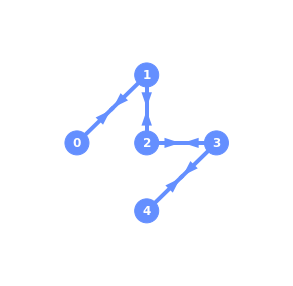

In [36]:
#that's not a problem!

from qiskit.visualization import plot_gate_map
backend = provider.get_backend('ibmq_manila')
plot_gate_map(backend, plot_directed=True) #check other things you can do in this within docs!

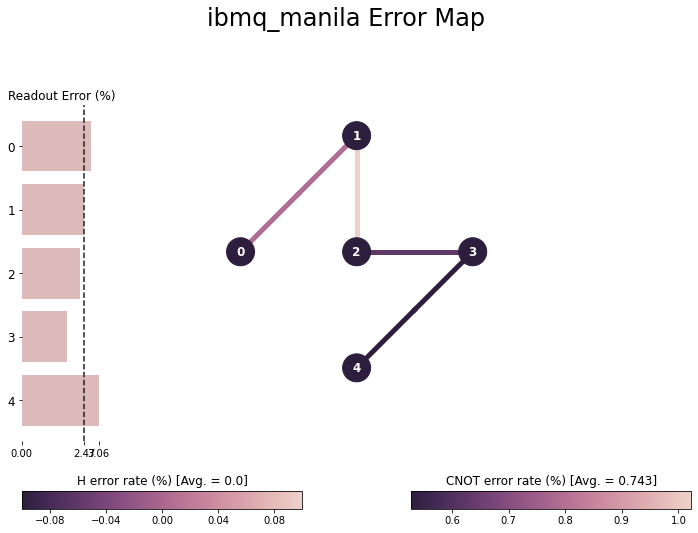

In [37]:
plot_error_map(backend) #I can also get my errors!

## Okay now I know my connectivity, I want to specify some couplings and run like that?

In [40]:
qc = QuantumCircuit(3)
qc.measure_all()
sim = BasicAer.get_backend('qasm_simulator')
couple_map = [[0,1],[1,2]] #specify some linear connection
job = execute(qc, sim, shots=1000, coupling_map=couple_map) #here is how you take that in execute also!
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 1000}


## Hope this has been helpful! Make sure to review the study guide, the sample questions and the documentation! Good luck on the exam!

## Let me know if this has been helpful for you and don't hesitate to give feedback on it, I am planning to refine it and make better commenting :)